In [1]:
#Подключаем библиотеки
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import dill
from random import randint

Эта функция выводит картинку по значениям пикселей

In [2]:
def show_image_data(ind, data_list):
    plt.figure()
    plt.imshow(data_list[ind])
    plt.colorbar()
    plt.grid(False)

Эта функция выводит 25 случайных картинок по пикселям и соответствующие им маркеры

In [3]:
def show_many_images(data_list, labels_list):
    plt.figure(figsize=(10,10))
    for i in range(25):
        ind = randint(1, 100)*i
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(data_list[ind], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels_list[ind]])

Эта функция добавляет нейронные сети в словарь с другими нейронными сетями, где ключом является запись вида:
кол-во входных нейронов, кол-во скрытых нейронов, кол-во выходных нейронов, коэффициент обучения, кол-во эпох обучения

In [4]:
def append_neural_network_object(nn_dict, nn_object, inodes, hnodes, onodes, lr, epochs):
     nn_dict[str(inodes) + ', ' + str(hnodes) + ', ' + str(onodes) + ', ' + str(lr) + ', ' + str(epochs)] = nn_object

Эта функция добавляет нейронные сети в словарь с эффективностями, где ключом является запись вида: кол-во входных нейронов, кол-во скрытых нейронов, кол-во выходных нейронов, коэффициент обучения, кол-во эпох обучения, а значением - ее эффективность при проверке на тестовом наборе данных

In [5]:
def append_efficients_dict(ef_dict, nn_object, inodes, hnodes, onodes, lr, epochs, efficiency):
    ef_dict[str(inodes) + ', ' + str(hnodes) + ', ' + str(onodes) + ', ' + str(lr) + ', ' + str(epochs)] = efficiency

Выводит все доступные ключи для доступа к нейронным сетям

In [6]:
def print_all_neural_networks_in_dict(nn_dict):
    print('Все доступные нейронные сети в формате (кол-во входных нейронов, кол-во скрытых нейронов, кол-во выходных нейронов, коэффициент обучения, количество пройденных эпох обучения):')
    keys = list(nn_dict.keys())
    i = 0
    for key in keys:
        i += 1
        print(i, ') ', key, sep='')

Удаляет выбранную нейронную сеть из словаря

In [8]:
def del_neural_network_object(nn_dict):
    keys = list(nn_dict.keys())
    print_all_neural_networks_in_dict(nn_dict)
    key = input('\nВведите нейронную сеть, которую хотите удалить из словаря, исходя из названий в списке. Для отмены введите "out":\n')
    if key == 'out':
        print('\nОтмена операции')
    else:
        if key in keys:
            its_return_object = nn_dict[key]
            del nn_dict[key]
            print('\nВозвращенный объект с параметрами ' + key)
            return its_return_object
        else:
            print('\nВведенная нейронная сеть не найдена')

Находит ключ с наибольшим значением в словаре

In [10]:
def key_for_max_value(this_dict):
    val = max(this_dict.values())
    print('Максимальное значение в словаре: ', val, '. Совершен возврат ключа данного значения.', sep='')
    for key in this_dict.keys():
        if this_dict[key] == val:
            return key

Загрузим базы данных для обучения и тестов

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Добавим названия одежды для классификации

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
train_images.shape #В обучающем наборе имеется 60 000 изображений, каждое изображение представлено как 28 x 28 пикселей

test_images.shape #В тестовом наборе имеется 10 000 изображений, каждое изображение представлено как 28 x 28 пикселей

len(train_labels) #В учебном наборе 60 000 меток

len(test_labels) #В тестовом наборе 10 000 меток

train_labels #Каждая метка представляет собой целое число от 0 до 9 (Показывается первые 3 метки и последние 3 метки)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

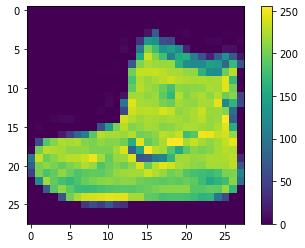

In [14]:
show_image_data(0, train_images)

Нормализуем данные

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Выведем 25 случайных маркированных картинок

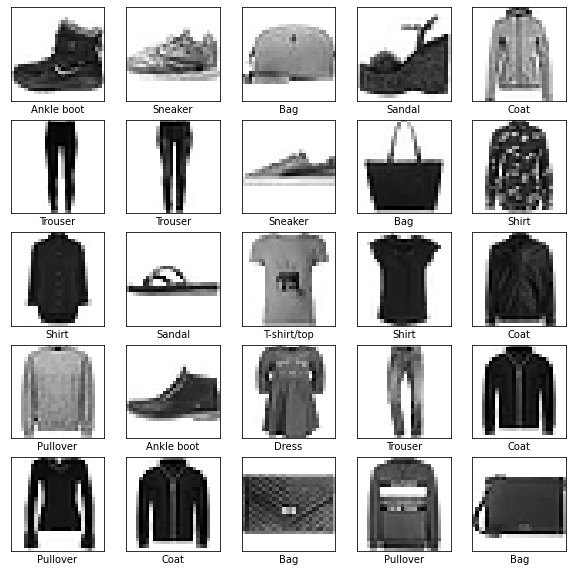

In [16]:
show_many_images(train_images, train_labels)

Обучаем огромное количество нейронных сетей с различными параметрами

In [17]:
input_nodes = (28, 28)
output_nodes = 10
neural_networks_dict = {}
efficiency_dict = {}
counter = 1
for epochs in range(5, 16, 5):
    for hidden_nodes in range(100, 350, 50):
        for learn in range(1, 8, 2):
            print(counter, '-ый/ой экземпляр', sep='')
            print('ОБУЧЕНИЕ!!!')
            counter += 1
            learning_rate = round(0.001 * learn / 2, 4)
            
            model = keras.Sequential([
                                        keras.layers.Flatten(input_shape=input_nodes),
                                        keras.layers.Dense(hidden_nodes, activation=tf.nn.relu),
                                        keras.layers.Dense(output_nodes, activation=tf.nn.softmax)
                                    ])
            
            model.compile(
                            optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy']
                         )
            
            model.fit(train_images, train_labels, epochs=epochs)
            
            print('ТЕСТИРОВАНИЕ!!!')
            test_loss, test_acc = model.evaluate(test_images, test_labels)
            print('Test accuracy:', test_acc, '\n'*3)

            append_neural_network_object(neural_networks_dict, model, 28*28, hidden_nodes, 10, learn, epochs)
            append_efficients_dict(efficiency_dict, model, 28*28, hidden_nodes, 10, learn, epochs, test_acc)

1-ый/ой экземпляр
ОБУЧЕНИЕ!!!
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5373 - accuracy: 0.8155
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3995 - accuracy: 0.8589
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3589 - accuracy: 0.8722
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3338 - accuracy: 0.8811
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3160 - accuracy: 0.8857
ТЕСТИРОВАНИЕ!!!
313/313 [==============================] - 1s 2ms/step - loss: 0.3621 - accuracy: 0.8690
Test accuracy: 0.8690000176429749 



2-ый/ой экземпляр
ОБУЧЕНИЕ!!!
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4964 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3732 - accuracy: 0.8649
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3375 - accura

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5071 - accuracy: 0.8227
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3781 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3361 - accuracy: 0.8780
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3098 - accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2900 - accuracy: 0.8941
ТЕСТИРОВАНИЕ!!!
313/313 [==============================] - 1s 2ms/step - loss: 0.3346 - accuracy: 0.8782
Test accuracy: 0.8781999945640564 



14-ый/ой экземпляр
ОБУЧЕНИЕ!!!
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4780 - accuracy: 0.8286
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3628 - accuracy: 0.8677
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3288 - accuracy: 0.8788
Epoch 4/5
1875/187

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3237 - accuracy: 0.8800
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3095 - accuracy: 0.8845
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2984 - accuracy: 0.8903
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2871 - accuracy: 0.8932
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2756 - accuracy: 0.8971
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2677 - accuracy: 0.8993
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2621 - accuracy: 0.9022
ТЕСТИРОВАНИЕ!!!
313/313 [==============================] - 1s 2ms/step - loss: 0.3731 - accuracy: 0.8728
Test accuracy: 0.8727999925613403 



24-ый/ой экземпляр
ОБУЧЕНИЕ!!!
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4919 - accuracy: 0.8227
Epoch 2/10
1875/1875

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3643 - accuracy: 0.8670
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3309 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3058 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2892 - accuracy: 0.8931
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2780 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2670 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2550 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2446 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2372 - accuracy: 0.9108
ТЕСТИРОВАНИЕ!!!
313/313 [==============================] - 1s 2ms/step - loss: 0.3486 - accu

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4989 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3738 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3342 - accuracy: 0.8790
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3098 - accuracy: 0.8864
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2886 - accuracy: 0.8939
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2730 - accuracy: 0.8993
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2599 - accuracy: 0.9046
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2487 - accuracy: 0.9083
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2376 - accuracy: 0.9116
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.225

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4850 - accuracy: 0.8271
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3721 - accuracy: 0.8645
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3413 - accuracy: 0.8750
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3200 - accuracy: 0.8827
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3052 - accuracy: 0.8864
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2948 - accuracy: 0.8896
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2865 - accuracy: 0.8929
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2755 - accuracy: 0.8975
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2685 - accuracy: 0.8994
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.263

1875/1875 [==============================] - 6s 3ms/step - loss: 0.2335 - accuracy: 0.9122
Epoch 15/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2252 - accuracy: 0.9143
ТЕСТИРОВАНИЕ!!!
313/313 [==============================] - 1s 2ms/step - loss: 0.3916 - accuracy: 0.8779
Test accuracy: 0.8779000043869019 



48-ый/ой экземпляр
ОБУЧЕНИЕ!!!
Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4876 - accuracy: 0.8241
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3819 - accuracy: 0.8600
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3544 - accuracy: 0.8707
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3322 - accuracy: 0.8777
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3184 - accuracy: 0.8817
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3073 - accuracy: 0.8872
Epoch 7/15
1875/1875

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2704 - accuracy: 0.8994
Epoch 11/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2658 - accuracy: 0.9009
Epoch 12/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2595 - accuracy: 0.9036
Epoch 13/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2537 - accuracy: 0.9045
Epoch 14/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2518 - accuracy: 0.9045
Epoch 15/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2470 - accuracy: 0.9070
ТЕСТИРОВАНИЕ!!!
313/313 [==============================] - 1s 2ms/step - loss: 0.3721 - accuracy: 0.8800
Test accuracy: 0.8799999952316284 



53-ый/ой экземпляр
ОБУЧЕНИЕ!!!
Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5020 - accuracy: 0.8245
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3748 - accuracy: 0.8663
Epoch 3/15
1875/

1875/1875 [==============================] - 9s 5ms/step - loss: 0.2744 - accuracy: 0.8985
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2606 - accuracy: 0.9039
Epoch 8/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2490 - accuracy: 0.9077
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2373 - accuracy: 0.9122
Epoch 10/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2282 - accuracy: 0.9153
Epoch 11/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2188 - accuracy: 0.9188
Epoch 12/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2110 - accuracy: 0.9225
Epoch 13/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2048 - accuracy: 0.9243
Epoch 14/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1966 - accuracy: 0.9278
Epoch 15/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1893 - a

In [21]:
neural_networks_dict

{'784, 100, 10, 1, 5': <tensorflow.python.keras.engine.sequential.Sequential at 0x1b7747997f0>,
 '784, 100, 10, 3, 5': <tensorflow.python.keras.engine.sequential.Sequential at 0x1b7777fe9a0>,
 '784, 100, 10, 5, 5': <tensorflow.python.keras.engine.sequential.Sequential at 0x1b7744e0f40>,
 '784, 100, 10, 7, 5': <tensorflow.python.keras.engine.sequential.Sequential at 0x1b77445c940>,
 '784, 150, 10, 1, 5': <tensorflow.python.keras.engine.sequential.Sequential at 0x1b7746e0310>,
 '784, 150, 10, 3, 5': <tensorflow.python.keras.engine.sequential.Sequential at 0x1b774341220>,
 '784, 150, 10, 5, 5': <tensorflow.python.keras.engine.sequential.Sequential at 0x1b774471c10>,
 '784, 150, 10, 7, 5': <tensorflow.python.keras.engine.sequential.Sequential at 0x1b77441a880>,
 '784, 200, 10, 1, 5': <tensorflow.python.keras.engine.sequential.Sequential at 0x1b7745c9850>,
 '784, 200, 10, 3, 5': <tensorflow.python.keras.engine.sequential.Sequential at 0x1b7777556d0>,
 '784, 200, 10, 5, 5': <tensorflow.pytho

In [22]:
efficiency_dict

{'784, 100, 10, 1, 5': 0.8690000176429749,
 '784, 100, 10, 3, 5': 0.8694000244140625,
 '784, 100, 10, 5, 5': 0.8629999756813049,
 '784, 100, 10, 7, 5': 0.8712999820709229,
 '784, 150, 10, 1, 5': 0.8628000020980835,
 '784, 150, 10, 3, 5': 0.8615999817848206,
 '784, 150, 10, 5, 5': 0.8723000288009644,
 '784, 150, 10, 7, 5': 0.8641999959945679,
 '784, 200, 10, 1, 5': 0.8802000284194946,
 '784, 200, 10, 3, 5': 0.870199978351593,
 '784, 200, 10, 5, 5': 0.8684999942779541,
 '784, 200, 10, 7, 5': 0.8618000149726868,
 '784, 250, 10, 1, 5': 0.8781999945640564,
 '784, 250, 10, 3, 5': 0.86080002784729,
 '784, 250, 10, 5, 5': 0.8712999820709229,
 '784, 250, 10, 7, 5': 0.8555999994277954,
 '784, 300, 10, 1, 5': 0.8762000203132629,
 '784, 300, 10, 3, 5': 0.8794999718666077,
 '784, 300, 10, 5, 5': 0.8597000241279602,
 '784, 300, 10, 7, 5': 0.8579999804496765,
 '784, 100, 10, 1, 10': 0.8805000185966492,
 '784, 100, 10, 3, 10': 0.8769999742507935,
 '784, 100, 10, 5, 10': 0.8727999925613403,
 '784, 100,

In [23]:
required_key = key_for_max_value(efficiency_dict)
print(required_key)

Максимальное значение в словаре: 0.8935999870300293. Совершен возврат ключа данного значения.
784, 250, 10, 1, 15


In [24]:
best_neural_network = neural_networks_dict[required_key]

In [25]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [28]:
predictions = best_neural_network.predict(test_images)

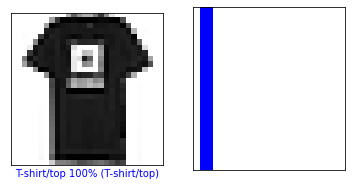

In [36]:
i = 121
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

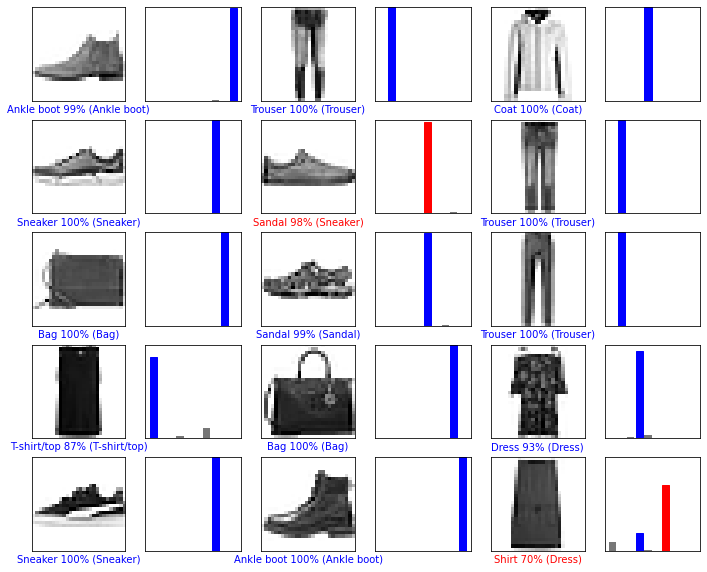

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(3*i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(3*i, predictions, test_labels)